In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
xs = np.linspace(0, 50, 2**10)

def f(x):
    amp = 1
    theta0, theta1, theta2 = map(lambda x: x*2*np.pi, [0.5, 1, 50])
    return amp*(np.sin(theta0*x) + np.sin(theta1*x) + np.sin(theta2*x)) 
    #return amp*(np.sin(theta1*x) + np.sin(theta2*x))

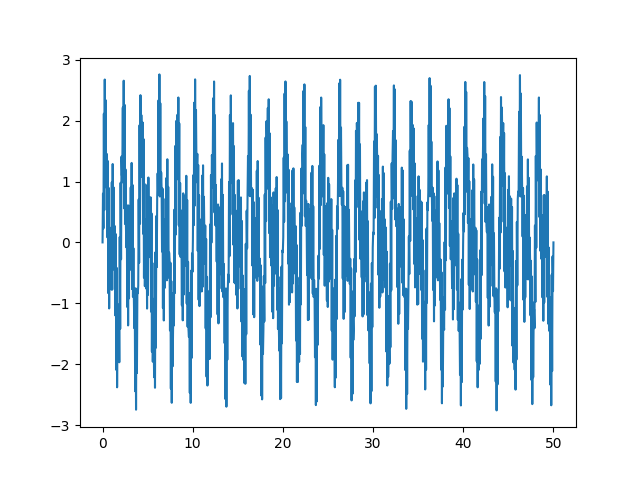

In [4]:
plt.figure()
ax = plt.axes()
ax.plot(xs, f(xs))

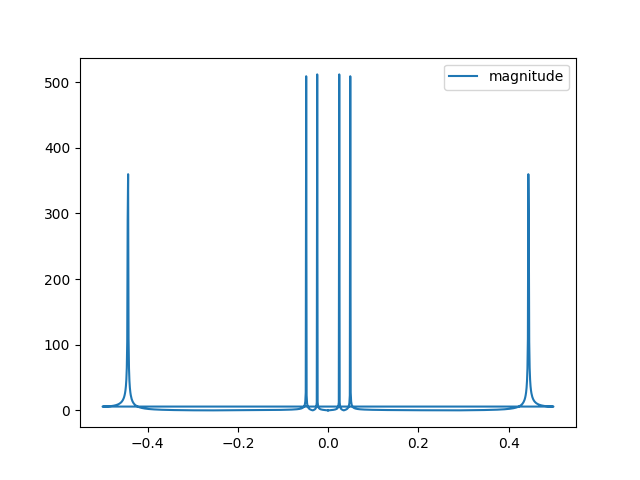

In [5]:
ys = f(xs)
ys_fft = np.fft.fft(ys)
freq = np.fft.fftfreq(xs.shape[-1])


plt.figure('Real and imaginary parts of FFT in freq domain')
ax = plt.axes()
#ax.plot(freq, ys_fft.real, label='real')
#ax.plot(freq, ys_fft.imag, label='imaginary')
#ax.plot(freq, np.sqrt(ys_fft.real**2 + ys_fft.imag**2), label='magnitude')
ax.plot(freq, np.abs(ys_fft), label='magnitude')
ax.legend()


In [6]:
#calculated_thetas = 

In [ ]:
#test high freq filter
# copy the FFT results
sig_fft_filtered = ys_fft.copy()

sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# obtain the frequencies using scipy function
freq = np.fft.fftfreq(len(xs), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()